# Desafio TERA - Classificação de fraude em transações bancárias

Desafio proposto na aula de modelos de classificação do curso de Ciência de dados e Machine Learning da escola TERA.
Nele analisaremos os dados sintéticos de transações bancárias de uma instituição fictícia.<br>
O objetivo do desafio é aplicar um modelo de classificação capaz de detectar fraudes.
Para isso seguiremos os seguintes passos:<br>
- 1.Carregando bibliotecas
- 2.Carregando dataset e informações básicas
- 3.Análise descritiva
- 4.Pré-processamento
- 5.Modelagem
- 6.Sumarizando resultados
- 7.Tunning hiperparametros
- 8.Análise dos resultados e conclusão
- 9.Referências

# 1.Carregando bibliotecas

In [1]:
import time

# Análise e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree as treeclass

# Pré-processamento de dados
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Métricas de avaliação de modelos
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Modelos de classificação
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LassoCV

# Seleção de variáveis e modelos
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel

# Usar estilo de gráfico da biblioteca ggplot
plt.style.use('ggplot')

# Formatar saidas de tabelas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 2.Carregando dataset e informações básicas

In [2]:
df = pd.read_csv('data/desafio_classificacao.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
# Amostra aleatória
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5605190,394,CASH_OUT,439626.72,C1985144540,132116.00,0.00,C2064798656,141761.40,581388.12,0,0
3338227,253,CASH_OUT,162133.27,C1155951445,0.00,0.00,C1480523944,342840.27,504973.54,0,0
5001908,353,TRANSFER,1703.46,C2105262187,0.00,0.00,C943459907,8838611.06,8840314.51,0,0
4945371,351,CASH_OUT,134542.27,C1178945760,0.00,0.00,C109023801,3056920.96,3191463.23,0,0
6039462,482,CASH_OUT,132438.82,C561223504,132438.82,0.00,C212208463,0.00,132438.82,1,0
2078713,182,CASH_OUT,218217.00,C646467792,0.00,0.00,C835326048,1451697.81,1669914.80,0,0
4729441,332,CASH_IN,95693.27,C1116149117,10960181.60,11055874.87,C855292481,2169924.89,2074231.62,0,0
4881354,348,TRANSFER,500947.30,C1574556135,10180.00,0.00,C1372353180,6212422.19,6713369.49,0,0
4782957,336,PAYMENT,2267.43,C714360920,85459.00,83191.57,M2003844391,0.00,0.00,0,0
3223591,250,CASH_IN,346064.86,C348993611,11011.00,357075.86,C1473232790,151558.57,0.00,0,0


# 3.Análise descritiva

In [4]:
# Descritiva de variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.00,243.40,142.33,1.00,156.00,239.00,335.00,743.00
amount,6362620.00,179861.90,603858.23,0.00,13389.57,74871.94,208721.48,92445516.64
oldbalanceOrg,6362620.00,833883.10,2888242.67,0.00,0.00,14208.00,107315.18,59585040.37
newbalanceOrig,6362620.00,855113.67,2924048.50,0.00,0.00,0.00,144258.41,49585040.37
oldbalanceDest,6362620.00,1100701.67,3399180.11,0.00,0.00,132705.66,943036.71,356015889.35
newbalanceDest,6362620.00,1224996.40,3674128.94,0.00,0.00,214661.44,1111909.25,356179278.92
isFraud,6362620.00,0.00,0.04,0.00,0.00,0.00,0.00,1.00
isFlaggedFraud,6362620.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [5]:
# Descritiva de variáveis categóricas
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


<Axes: xlabel='type', ylabel='count'>

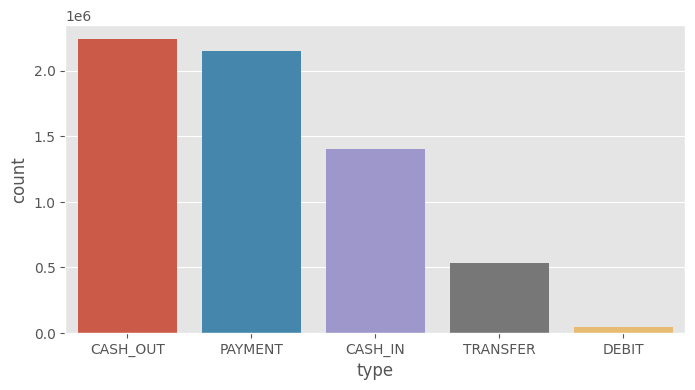

In [6]:
# Gráfico tipos de transações
plt.figure(figsize=(8,4))

sns.countplot(data = df, x = 'type', order=df['type'].value_counts().index)

In [7]:
# Contagem de transações que foram sinalizadas como fraude
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [8]:
# Contagem de transações que foram identificadas como fraude
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
# Excluindo duplicatas
df.drop_duplicates(keep=False, inplace=True)

[Text(0, 0, '2.23338e+06'),
 Text(0, 0, '2.1515e+06'),
 Text(0, 0, '1.39928e+06'),
 Text(0, 0, '528812'),
 Text(0, 0, '41432')]

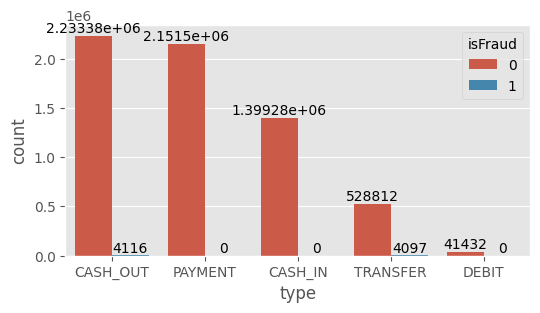

In [10]:
# Gráfico de transações que são fraude por tipo de transações
plt.figure(figsize=(6,3))

ax = sns.countplot(data = df, x = 'type', 
                   order=df['type'].value_counts().index,   # ordem decrescente
                   hue='isFraud')                           # separando transações legitimas de fraude

# Exibir contagem no gráfico
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])

Somente as transações "CASH_OUT" e "TRANSFER" apresentam fraude.<br>
A variável "type" pode ter uma grande importancia para o modelo.

In [11]:
# Tabela de transações que são fraude por tipo de transações
fraude = df.groupby('isFraud')['type'].value_counts().to_frame()
fraude.columns = ['quantidade']
fraude

quantidade
isFraud type                
0       CASH_OUT     2233384
        PAYMENT      2151495
        CASH_IN      1399284
        TRANSFER      528812
        DEBIT          41432
1       CASH_OUT        4116
        TRANSFER        4097

In [12]:
# Conta de destino de transações fraudulentas
df[df['isFraud'] == 1]['nameDest'].value_counts()

C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: nameDest, Length: 8169, dtype: int64

In [13]:
# Análise descritiva de quantidade envolvida nas transações fraudulentas
df[df['isFraud'] == 1]['amount'].describe()

count       8213.00
mean     1467967.30
std      2404252.95
min            0.00
25%       127091.33
50%       441423.44
75%      1517771.48
max     10000000.00
Name: amount, dtype: float64

<Axes: xlabel='amount', ylabel='Count'>

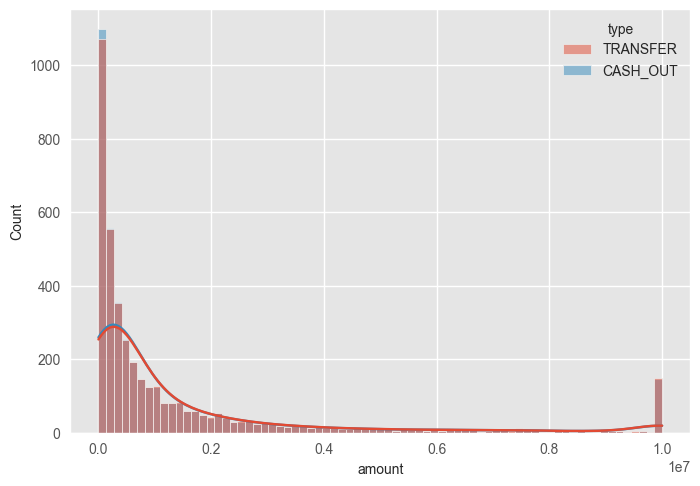

In [14]:
# Histograma de quantidade envolvida nas transações fraudulentas
sns.histplot(df[df['isFraud'] == 1], x = 'amount', kde = True, hue='type')

Investigando o comportamento da variável "amount" nas transações fraudulentas podemos observar que elas se comportam de maneira similar nos dois tipos de transações.

<Axes: xlabel='amount', ylabel='Count'>

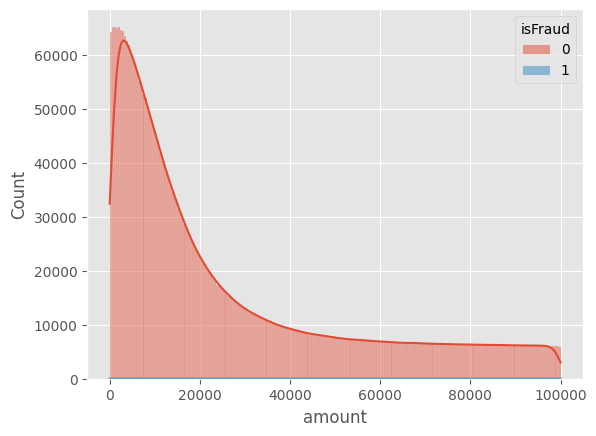

In [15]:
# Histograma de quantidade envolvida, comparando transações fraudulentas e legítimas
sns.histplot(df[df['amount'] < 100000], x = 'amount', kde = True, hue='isFraud')

In [17]:
df[df['isFraud'] == 1].shape[0]/df.shape[0]*100

0.12908204481801522

A visualização para todo o data set não trouxe informações adicionais, pois como apresenta grande amplitude dos valores com contagem relativamente baixa, então não foi possivel obter informações a partir dessa visualização.<br>
Quando limitamos o valor para menos de 1000000 conseguimos observar uma sobreposição de valores das transações legítimas e fraude, porém com menor contagem, ja que as fraudes contabilizam somente 0.12% do dataset.

In [20]:
# Análise descritiva das variáveis numéricas agrupadas por ser ou não fraude
df.groupby('isFraud').describe().T

isFraud                         0            1
step           count   6354407.00      8213.00
               mean        243.24       368.41
               std         142.14       216.39
               min           1.00         1.00
               25%         156.00       181.00
               50%         239.00       367.00
               75%         334.00       558.00
               max         718.00       743.00
amount         count   6354407.00      8213.00
               mean     178197.04   1467967.30
               std      596236.98   2404252.95
               min           0.01         0.00
               25%       13368.40    127091.33
               50%       74684.72    441423.44
               75%      208364.76   1517771.48
               max    92445516.64  10000000.00
oldbalanceOrg  count   6354407.00      8213.00
               mean     832828.71   1649667.61
               std     2887144.03   3547719.44
               min           0.00         0.00
               25%           0.00    125822.44
               50%       14069.00    438983.45
               75%      106969.50   1517771.48
               max    43818855.30  59585040.37
newbalanceOrig count   6354407.00      8213.00
               mean     855970.23    192392.63
               std     2924986.96   1965666.46
               min           0.00         0.00
               25%           0.00         0.00
               50%           0.00         0.00
               75%      144730.74         0.00
               max    43686616.33  49585040.37
oldbalanceDest count   6354407.00      8213.00
               mean    1101420.87    544249.62
               std     3399201.79   3336420.95
               min           0.00         0.00
               25%           0.00         0.00
               50%      133311.80         0.00
               75%      944144.58    147828.66
               max   356015889.35 236230516.82
newbalanceDest count   6354407.00      8213.00
               mean    1224925.68   1279707.62
               std     3673815.71   3908816.53
               min           0.00         0.00
               25%           0.00         0.00
               50%      214881.70      4676.42
               75%     1111975.34   1058725.22
               max   356179278.92 236726494.66
isFlaggedFraud count   6354407.00      8213.00
               mean          0.00         0.00
               std           0.00         0.04
               min           0.00         0.00
               25%           0.00         0.00
               50%           0.00         0.00
               75%           0.00         0.00
               max           0.00         1.00

# 4.Pré-Processamento

Nessa etapa faremos primeiro a divisão entre treino e teste antes mesmo de aplicarmos transformações nos dados.<br>
Isso evita que os modelos não estejam enviesados, e nesse caso específico ocorre devido **"DATA-LEAKAGE"**.<br>
O termo se refere ao vazamento de informações dos dados de teste que supostamente não deveriam estar disponiveis para o modelo de treinamento.<br>
Caso façamos as transformações antes de separarmos o conjunto de dado, entre treino e teste, informações de todo o dataset será compartilhado com o modelo. Isso pode resultar em um modelo ja preparado para prever dados que supostamente não deveria ter conhecimento e consequentemente resultar em overfitting (materiais nas referencias).  

## Train Test Split

Após alguns testes iniciais foi identificado que os melhores dados para serem investigados seriam os selecionados abaixos.<br>
Mais abaixo serão comentados os motivos

In [21]:
# Features
X = df[['step', 'type', 'amount', 'oldbalanceOrg', 
        'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Target para previsão
Y = df['isFraud']


x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.33,   # tamanho do dataset de teste
                                                    stratify = Y,       # balancear target entre treino e teste
                                                    random_state = 42) 

## StandardScaling

Usaremos o StandardScaler pois é um método mais robusto para tratar variáveis numéricas, sendo menos influenciável por valores discrepantes, podendo auxiliar na performance dos nossos modelos.

In [22]:
# Variáveis numéricas
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Instanciando o StandarScaler
scaler = StandardScaler()

# Fit_transform das variáveis numéricas do treino
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

# Transform das variáveis numéricas do teste
x_test[num_cols] = scaler.transform(x_test[num_cols])

## OneHotEncoding

Usaremos o método OneHotEncoding pois ele consegue driblar uma limitação do LabelEncoder, que pode ter dificuldades em transformar variáveis que nunca apareceram apra ele. No caso previamente foi feito teste e isso ocorreu com frequencia. Então foi escolhido metodo OnehotEncoding. Porém ele tambem tem uma limitação, que é a grande dimensão do dataframe quando há muitas categorias em uma variável. Devido a essa limitação foram excluidas da análise as colunas do dataframe com muitas categorias.

In [23]:
# Variável categórica
cat_cols = ['type']

# Instanciando OneHotEncoder
ohe = OneHotEncoder()

# Fit_transform da variável categórica do treino
encoding_train = ohe.fit_transform(x_train[cat_cols])

# Transform da variável categórica do teste
encoding_test = ohe.transform(x_test[cat_cols])


# Transformando dado tratado em dataframe
df_encoding_train = pd.DataFrame(encoding_train.toarray(),                      # transformando em array
                                 columns=ohe.get_feature_names_out(cat_cols))   # resgantando nomes da variável

# Transformando dado tratado em dataframe
df_encoding_test = pd.DataFrame(encoding_test.toarray(),                        # transformando em array 
                                columns=ohe.get_feature_names_out(cat_cols))    # resgantando nomes da variável

# Reagrupando dados em um unico dataframe de treino
x_train = pd.concat([x_train.reset_index(drop=True), df_encoding_train], axis=1)
x_train.drop(cat_cols, axis=1, inplace=True)

# Reagrupando dados em um unico dataframe de teste
x_test = pd.concat([x_test.reset_index(drop=True), df_encoding_test], axis=1)
x_test.drop(cat_cols, axis=1, inplace=True)

# 5.Modelagem

Para a avaliação da performance dos modelos utilizaremos algumas métricas, que guiarão as decisões para adoção do modelo mais adequado para ser implementado.<br>
Queremos ser o mais precisos possível, e o objetivo maior que buscamos é 1) detectar fraudes, 2) reduzir os possíveis casos de fraude que não são detectados como fraude e 3) diminuir numeros de transações legitimas que podem ser interpretadas como fraude. Tudo isso levando em conta o tempo que o modelo leva para executar as análises e concluir se há ou não fraude.<br>
Para isso utilizaremos:
- Acurácia
- Precision
- Recall
- F1 Score
- Curva ROC/AUC
- Tempo de execução do modelo


## Regressão Logística - Modelo base

### Treino e teste do modelo

In [24]:
# Iniciando contagem do tempo do modelo
tempo_inic_lr = time.time()

# Instanciando modelo
lr = LogisticRegression()

# Fit do modelo nos dados
lr.fit(x_train, y_train)

# Fazendo previsões com os dados de teste
y_pred_lr = lr.predict(x_test)

# Finalizando contagem do tempo do modelo
tempo_final_lr = time.time()

# Calculo do tempo de de execução
tempo_total_lr = tempo_final_lr - tempo_inic_lr

d:\ciencia_de_dados\projetos\classificacao_desafio_tera\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Métricas

Metricas para classificação com Regressão Logística
Tempo de execução do modelo: 39.066 segundos
------------------------------------------------------
Acurácia: 0.999
Precision: 0.92
Recall: 0.413


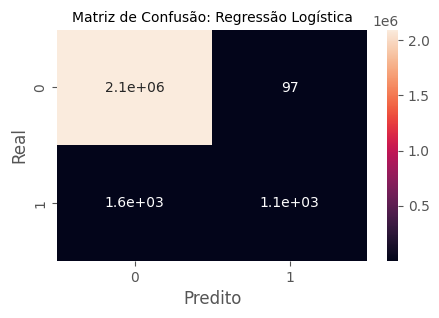

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.92      0.41      0.57      2710

    accuracy                           1.00   2099665
   macro avg       0.96      0.71      0.78   2099665
weighted avg       1.00      1.00      1.00   2099665

------------------------------------------------------


In [35]:
print("="*54)
print(f'Metricas para classificação com Regressão Logística')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_lr, 3)} segundos")
print("-"*54)
print("Acurácia:", accuracy_score(y_test, y_pred_lr).round(3))
print("Precision:", precision_score(y_test, y_pred_lr).round(3))
print("Recall:", recall_score(y_test, y_pred_lr).round(3))

# Construindo matriz de confusão                                      
confusion_matrix = pd.crosstab(y_test, y_pred_lr, rownames = ['Real'], colnames = ['Predito'])
plt.figure(figsize=(5,3))
plt.title("Matriz de Confusão: Regressão Logística", fontsize=10)
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print('-'*54)
print(classification_report(y_test, y_pred_lr))
print('-'*54)

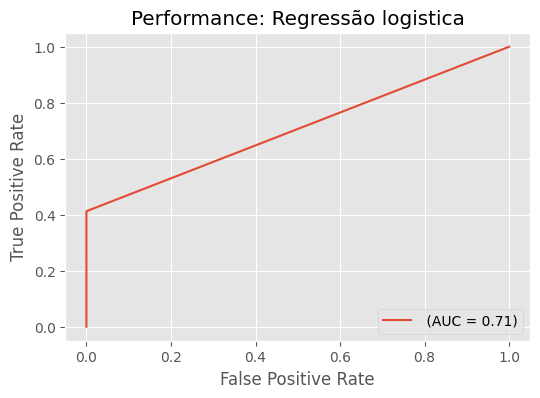

In [36]:
# Obtendo métricas do modelo
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_pred_lr)

# Obtendo dados da curva
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

# Curva
display = metrics.RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=roc_auc_lr,
                                   estimator_name='')

# Gráfico
fig, ax = plt.subplots(figsize=(6,4))  
plt.title('Performance: Regressão logistica')
display.plot(ax=ax)
plt.show()

Com um simples modelo de regressão logística obtivemos uma AUC de 71%, mais eficiente do que o acaso. Isso é já um avanço, porém o número de transações fraudulentas que foram consideradas genuínas foram maior do que as fraudes que foram consideradas fraudes, oou seja, um modelo que ainda não performa tão bem.

### Variáveis influentes

Uma maneira de aumentar a performance do modelo, é seleciondo as variáveis mais influentes, aquelas que realmente contribuem para que o modelo faça previsões mais precisas e eliminando aquelas que geram ruidos aumentam a complexidade e diminuiem performance.<br>
Esses métodos podem ser divididos em:
- Filter (testes estatisticos para avaliar relação das features com target)
    - Coeficiente de correlação
    - SelectKBest
    - SelectFromModel
    - Mutual information
    - Teste Chi Quadrado
- Wrappper (métodos baseados em performance de modelos treinados com diferentes combinações de variáveis)
    - RFE
    - Foward/backward feature selection
- Embedded (combinação de seleção de variáveis com treino de modelos)
    - Lasso
    - Ridge
    - Elastic Net
- Dimensionality reduction
    - PCA
    - LDA
    - t-SNE<br>

Para regressão logistic usaremos RFE e SelectFromModel

#### RFE

In [22]:
# Instanciando RFE
rfe_lr = RFE(estimator = lr, n_features_to_select = 7)

# Fit RFE
rfe_lr.fit(x_train, y_train)

# Selecionando as 7 variáveis mais influentes
x_train_lr_rfe = rfe_lr.transform(x_train)
x_test_lr_rfe = rfe_lr.transform(x_test)

# Fit do modelo de regressão logistica com as variáveis selecionadas pelo RFE
lr.fit(x_train_lr_rfe, y_train)

# Previsão
y_pred_lr_rfe = lr.predict(x_test_lr_rfe)

accuracy_lr_rfe = lr.score(x_test_lr_rfe, y_test)
print("Acurácia geral usando RFE:", accuracy_lr_rfe)

Acurácia geral usando RFE: 0.999153674514744


In [23]:
# retornando nome das variáveis
rfe_lr_support = rfe_lr.support_
rfe_lr_features = x_train.columns[rfe_lr_support]
print("Features selecionadas:", rfe_lr_features)

Features selecionadas: Index(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'type_CASH_IN', 'type_CASH_OUT', 'type_TRANSFER'],
      dtype='object')


#### SelectFromModel

In [24]:
# Instanciando modelo
lr_sfm = LogisticRegression()

# Fit do modelo
lr_sfm = lr_sfm.fit(x_train, y_train)

# Instanciando SelectFromModel
lr_sfm = SelectFromModel(lr_sfm, prefit=True, max_features=7)

# Fit do modelo com as variáveis selecionadas
x_train_lr_sfm = lr_sfm.transform(x_train)

lr_sfm_features = x_train.columns[lr_sfm.get_support()]

print("Features selecionadas:", lr_sfm_features)

Features selecionadas: Index(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], dtype='object')


## Árvore de decisão

### Treino e teste do modelo

In [49]:
# Iniciando contagem do tempo do modelo
tempo_inic_tree = time.time()

# Instanciando modelo
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 42)

# tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 42, ccp_alpha=0.0001)

# Fit do modelo nos dados
tree.fit(x_train, y_train)

# Fazendo previsões com os dados de teste
y_pred_tree = tree.predict(x_test)

# Finalizando contagem do tempo do modelo
tempo_final_tree = time.time()

# Calculo do tempo de de execução
tempo_total_tree = tempo_final_tree - tempo_inic_tree

### Métricas

Metricas para classificação com Árvore de Decisão
Tempo de execução do modelo: 37.775 segundos
------------------------------------------------------
Acurácia: 1.0
Precision: 0.968
Recall: 0.747


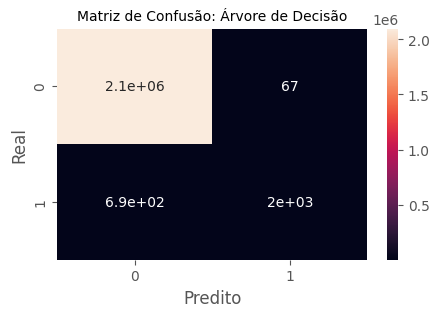

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.97      0.75      0.84      2710

    accuracy                           1.00   2099665
   macro avg       0.98      0.87      0.92   2099665
weighted avg       1.00      1.00      1.00   2099665

------------------------------------------------------


In [50]:
print("="*54)
print(f'Metricas para classificação com Árvore de Decisão')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_tree, 3)} segundos")
print("-"*54)
print("Acurácia:", accuracy_score(y_test, y_pred_tree).round(3))
print("Precision:", precision_score(y_test, y_pred_tree).round(3))
print("Recall:", recall_score(y_test, y_pred_tree).round(3))
confusion_matrix = pd.crosstab(y_test, y_pred_tree, rownames = ['Real'], colnames = ['Predito'])
plt.figure(figsize=(5,3))
plt.title("Matriz de Confusão: Árvore de Decisão", fontsize=10)
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print('-'*54)
print(classification_report(y_test, y_pred_tree))
print('-'*54)

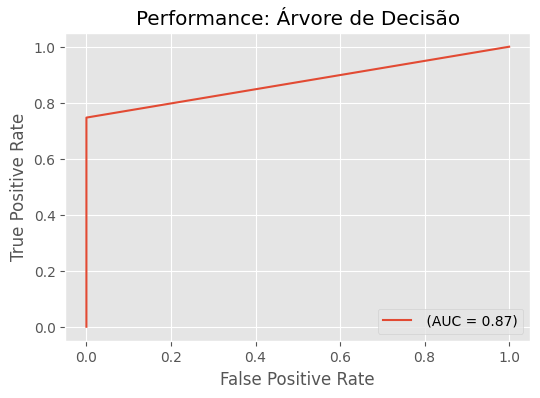

In [51]:
fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(y_test, y_pred_tree)
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)
display = metrics.RocCurveDisplay(fpr=fpr_tree, tpr=tpr_tree, roc_auc=roc_auc_tree,
                                   estimator_name='')
fig, ax = plt.subplots(figsize=(6,4))
plt.title('Performance: Árvore de Decisão')
display.plot(ax=ax)
plt.show()

Com a árvore de decisão já conseguimos obter algumas métricas melhoras. A AUC aumentou para 87%, e conseguimos identificar em número maior as transações de fraude, diminuindo também o número de transações genuínas que foram interpretadas como fraude (evitando mais atritos com clientes).

### Variáveis influentes

#### Feature_importance

In [28]:
# Identificando valores de importancia e transformando em dataframe
tree_importance = pd.DataFrame(tree.feature_importances_, index=x_train.columns)
tree_importance.columns = ['importancia']
tree_importance.sort_values(by='importancia', ascending=False)  # organizando em ordem decrescente

,importancia
oldbalanceOrg,0.33
newbalanceDest,0.22
amount,0.17
newbalanceOrig,0.09
type_TRANSFER,0.07
type_CASH_OUT,0.05
step,0.04
oldbalanceDest,0.03
type_CASH_IN,0.00
type_DEBIT,0.00


<Axes: title={'center': 'Árvore de decisão: Feature Importance'}>

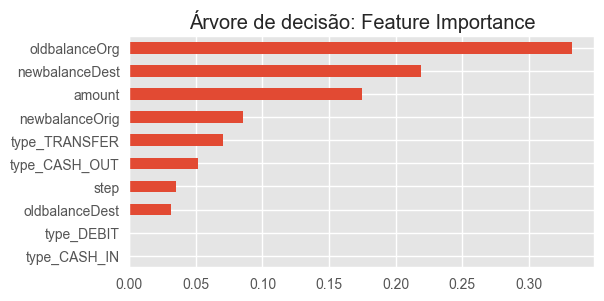

In [29]:
# Gráfico de feature importance
plt.figure(figsize=(6, 3))

plt.title('Árvore de decisão: Feature Importance')
tree_importances = pd.Series(tree.feature_importances_, index= x_train.columns)
tree_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')

#### RFE

In [30]:
rfe_tree = RFE(estimator = tree, n_features_to_select = 7)

rfe_tree.fit(x_train, y_train)

x_train_tree_rfe = rfe_tree.transform(x_train)
x_test_tree_rfe = rfe_tree.transform(x_test)

tree.fit(x_train_tree_rfe, y_train)

y_pred_tree_rfe = tree.predict(x_test_tree_rfe)

accuracy_tree_rfe = tree.score(x_test_tree_rfe, y_test)
print("Acurácia geral usando RFE:", accuracy_tree_rfe)

Acurácia geral usando RFE: 0.9996194631048286


In [31]:
rfe_tree_support = rfe_tree.support_
rfe_tree_features = x_train.columns[rfe_tree_support]
print("Features selecionadas:", rfe_tree_features)

Features selecionadas: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest',
       'type_CASH_OUT', 'type_TRANSFER'],
      dtype='object')


#### SelectFromModel

In [32]:
tree_sfm = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 42)

tree_sfm = tree_sfm.fit(x_train, y_train)

tree_sfm = SelectFromModel(tree_sfm, prefit=True, max_features=7)

x_train_tree_sfm = tree_sfm.transform(x_train)

tree_sfm_features = x_train.columns[tree_sfm.get_support()]

print("Features selecionadas:", tree_sfm_features)

Features selecionadas: Index(['amount', 'oldbalanceOrg', 'newbalanceDest'], dtype='object')


## Random Forest

### Treino e teste do modelo

In [30]:
tempo_inic_rnd = time.time()

rnd = RandomForestClassifier(n_estimators = 5, random_state = 42)

rnd.fit(x_train, y_train)

y_pred_rnd = rnd.predict(x_test)

tempo_final_rnd = time.time()

tempo_total_rnd = tempo_final_rnd - tempo_inic_rnd

### Métricas

Metricas para classificação com Random Forest
Tempo de execução do modelo: 121.235 segundos
------------------------------------------------------
Acurácia: 1.0
Precision: 0.958
Recall: 0.792


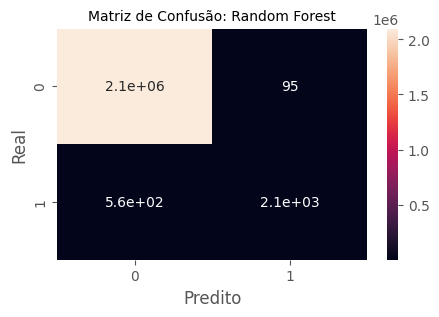

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.96      0.79      0.87      2710

    accuracy                           1.00   2099665
   macro avg       0.98      0.90      0.93   2099665
weighted avg       1.00      1.00      1.00   2099665

------------------------------------------------------


In [40]:
print("="*54)
print(f'Metricas para classificação com Random Forest')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_rnd, 3)} segundos")
print("-"*54)
print("Acurácia:", accuracy_score(y_test, y_pred_rnd).round(3))
print("Precision:", precision_score(y_test, y_pred_rnd).round(3))
print("Recall:", recall_score(y_test, y_pred_rnd).round(3))
confusion_matrix = pd.crosstab(y_test, y_pred_rnd, rownames = ['Real'], colnames = ['Predito'])
plt.figure(figsize=(5,3))
plt.title("Matriz de Confusão: Random Forest", fontsize =10)
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print('-'*54)
print(classification_report(y_test, y_pred_rnd))
print('-'*54)

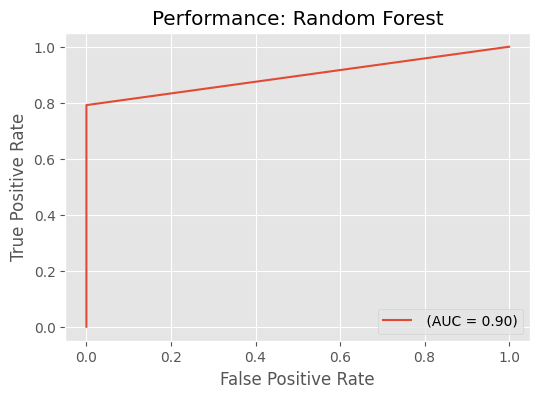

In [41]:
fpr_rnd, tpr_rnd, thresholds = metrics.roc_curve(y_test, y_pred_rnd)
roc_auc_rnd = metrics.auc(fpr_rnd, tpr_rnd)
display = metrics.RocCurveDisplay(fpr=fpr_rnd, tpr=tpr_rnd, roc_auc=roc_auc_rnd,
                                   estimator_name='')
fig, ax = plt.subplots(figsize=(6,4))
plt.title('Performance: Random Forest')
display.plot(ax=ax)
plt.show()

Com Random Forest conseguimos diminuir as fraudes que passaram como transações genuínas e aumentamos novamente as transações genuinas que foram consideradas fraude e uma AUC de 90%.

### Variáveis influentes

#### Feature_importance

In [37]:
rnd_importance = pd.DataFrame(rnd.feature_importances_, index=x_train.columns)
rnd_importance.columns = ['importancia']
rnd_importance.sort_values(by='importancia', ascending=False)

,importancia
newbalanceDest,0.25
oldbalanceOrg,0.24
amount,0.21
step,0.12
oldbalanceDest,0.06
type_TRANSFER,0.06
newbalanceOrig,0.03
type_CASH_OUT,0.01
type_CASH_IN,0.00
type_PAYMENT,0.00


<Axes: title={'center': 'Random Forest: Feature Importance'}>

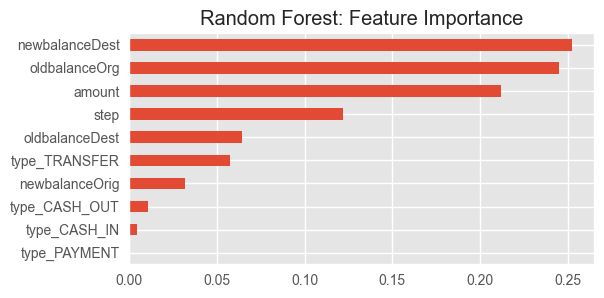

In [38]:
plt.figure(figsize=(6, 3))

plt.title('Random Forest: Feature Importance')
rnd_importances = pd.Series(rnd.feature_importances_, index= x_train.columns)
rnd_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')

#### RFE

In [39]:
rfe_rnd = RFE(estimator = rnd, n_features_to_select = 7)

rfe_rnd.fit(x_train, y_train)

x_train_rnd_rfe = rfe_rnd.transform(x_train)
x_test_rnd_rfe = rfe_rnd.transform(x_test)

rnd.fit(x_train_rnd_rfe, y_train)

y_pred_rnd_rfe = rnd.predict(x_test_rnd_rfe)

accuracy_rnd_rfe = rnd.score(x_test_rnd_rfe, y_test)
print("Acurácia geral usando RFE:", accuracy_rnd_rfe)

Acurácia geral usando RFE: 0.9996770913455242


In [40]:
rfe_rnd_support = rfe_rnd.support_
rfe_rnd_features = x_train.columns[rfe_rnd_support]
print("Features selecionadas:", rfe_rnd_features)

Features selecionadas: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_TRANSFER'],
      dtype='object')


#### SelectFromModel

In [41]:
rnd_sfm = RandomForestClassifier(n_estimators = 5, random_state = 42)

rnd_sfm = rnd_sfm.fit(x_train, y_train)

rnd_sfm = SelectFromModel(rnd_sfm, prefit=True, max_features=7)

x_train_rnd_sfm = rnd_sfm.transform(x_train)

rnd_sfm_features = x_train.columns[rnd_sfm.get_support()]

print("Features selecionadas:", rnd_sfm_features)

Features selecionadas: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceDest'], dtype='object')


## XGBoost

### Treino e teste do modelo

In [33]:
tempo_inic_xgb = time.time()

params = {'learning_rate': 0.1,
          'colsample_bytree' : 0.3,
          'max_depth': 10,
          'objective': 'binary:logistic',
          'alpha' : 10,
          'n_estimators': 100}

xgb = XGBClassifier(**params)

xgb.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)],
        eval_metric='auc', verbose=False)

y_pred_xgb = xgb.predict(x_test)

tempo_final_xgb = time.time()

tempo_total_xgb = tempo_final_xgb - tempo_inic_xgb

d:\ciencia_de_dados\projetos\classificacao_desafio_tera\venv\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


### Métricas

Metricas para classificação com XGBoost
Tempo de execução do modelo: 343.167 segundos
------------------------------------------------------
Acurácia: 1.0
Precision: 0.998
Recall: 0.691


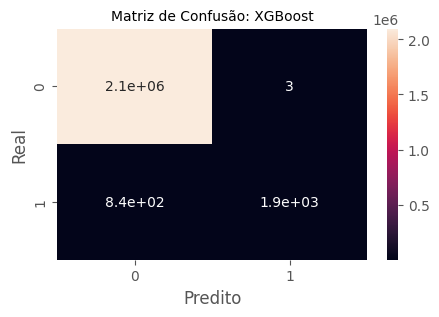

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       1.00      0.69      0.82      2710

    accuracy                           1.00   2099665
   macro avg       1.00      0.85      0.91   2099665
weighted avg       1.00      1.00      1.00   2099665

------------------------------------------------------


In [43]:
print("="*54)
print(f'Metricas para classificação com XGBoost')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_xgb, 3)} segundos")
print("-"*54)
print("Acurácia:", accuracy_score(y_test, y_pred_xgb).round(3))
print("Precision:", precision_score(y_test, y_pred_xgb).round(3))
print("Recall:", recall_score(y_test, y_pred_xgb).round(3))
confusion_matrix = pd.crosstab(y_test, y_pred_xgb, rownames = ['Real'], colnames = ['Predito'])
plt.figure(figsize=(5,3))
plt.title("Matriz de Confusão: XGBoost", fontsize = 10)
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print('-'*54)
print(classification_report(y_test, y_pred_xgb))
print('-'*54)

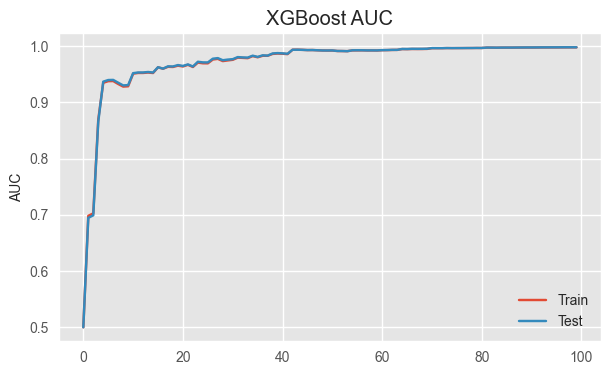

CPU times: total: 125 ms
Wall time: 180 ms


In [44]:
%%time
fig, ax = plt.subplots(figsize=(7,4))

evals_result = xgb.evals_result()
x_axis = range(0, len(evals_result['validation_0']['auc']))

ax.plot(x_axis, evals_result['validation_0']['auc'], label='Train')
ax.plot(x_axis, evals_result['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

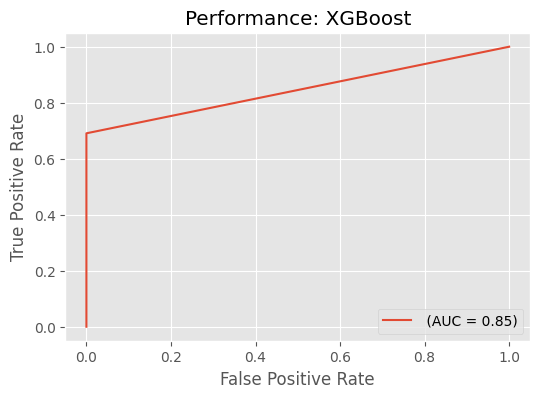

In [44]:
fpr_xgb, tpr_xgb, thresholds_xgb = metrics.roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)
display = metrics.RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb, roc_auc=roc_auc_xgb,
                                   estimator_name='')
fig, ax = plt.subplots(figsize=(6,4)) 
plt.title('Performance: XGBoost')
display.plot(ax=ax)
plt.show()

Com XGboost conseguimos diminuir a detecção de transações genuinas como fraude, porém o número de transações fraudulentas que foram consideradas genuínas voltaram a aumentar, e a AUC de 85% ficou abaixo ainda de um modelo mais simples como a Arvore de decisão.<br>
No primeiro gráfico de curva do XGBoost podemos ver que as métricas para treino e teste estão muito próximas, podendo indicar **"OVERFITTING"** do modelo.

### Variáveis influentes

#### Feature_importance

In [46]:
xgb_importance = pd.DataFrame(xgb.feature_importances_, index=x_train.columns)
xgb_importance.columns = ['importancia']
xgb_importance.sort_values(by='importancia', ascending=False)

,importancia
newbalanceOrig,0.28
type_TRANSFER,0.16
type_PAYMENT,0.10
type_CASH_OUT,0.10
oldbalanceOrg,0.09
newbalanceDest,0.07
type_CASH_IN,0.07
oldbalanceDest,0.05
amount,0.04
step,0.03


<Axes: title={'center': 'XHBoost: Feature Importance'}>

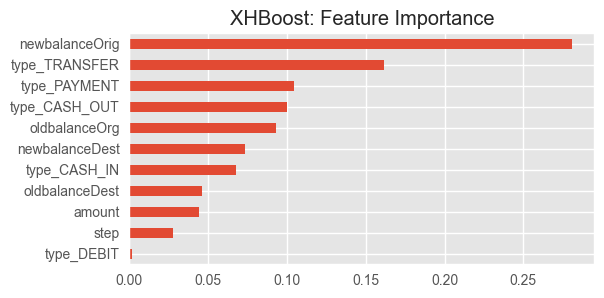

In [52]:
plt.figure(figsize=(6, 3))

plt.title('XHBoost: Feature Importance')
xgb_importances = pd.Series(xgb.feature_importances_, index= x_train.columns)
xgb_importances.nlargest(11).sort_values(ascending=True).plot(kind='barh')

## Outras técnicas de seleção de features

#### SelectKBest

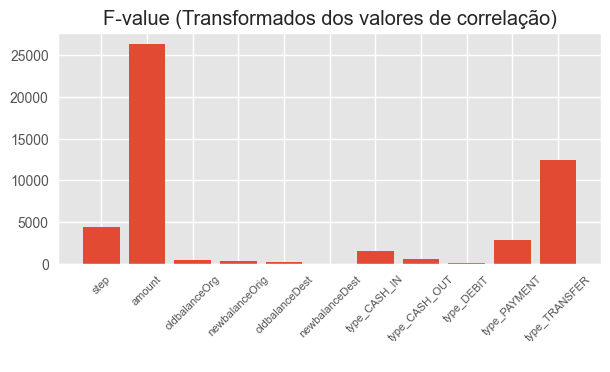

In [62]:
f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(x_train, y_train)
x_teste_fs = f_selector.transform(x_test)

col_names = x_train.columns


plt.figure(figsize=(7,3))
ax = plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel(" ")
plt.xticks(range(len(col_names)), col_names, fontsize=8, rotation = 45)
plt.title("F-value (Transformados dos valores de correlação)")
plt.show()

#### Mutual_info_class

In [57]:
f_selector_2 = SelectKBest(score_func=mutual_info_classif, k=5)
f_selector_2.fit(x_train, y_train)
x_teste_fs_2 = f_selector_2.transform(x_test)

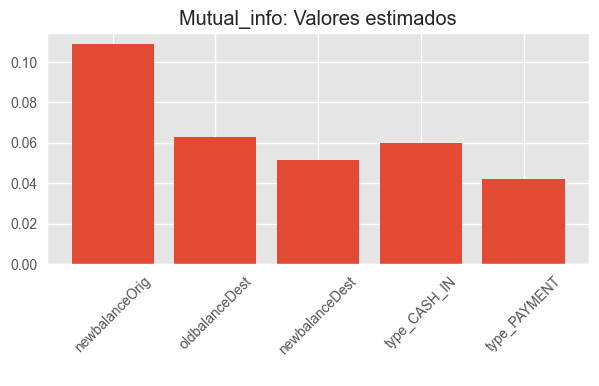

In [65]:
mask = f_selector_2.get_support()          # "mascara" para as features selecionadas
selected_features = x_train.columns[mask]  # index para colunas originais usando a mascara

plt.figure(figsize=(7,3))
plt.bar(selected_features, f_selector_2.scores_[mask])
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.title("Mutual_info: Valores estimados")
plt.show()

#### Lasso

In [66]:
alphas = [0.001, 0.01, 0.1, 1, 10]

lasso = LassoCV(cv=5, random_state=101, alphas = alphas)

lasso.fit(x_train, y_train)

LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5, random_state=101)

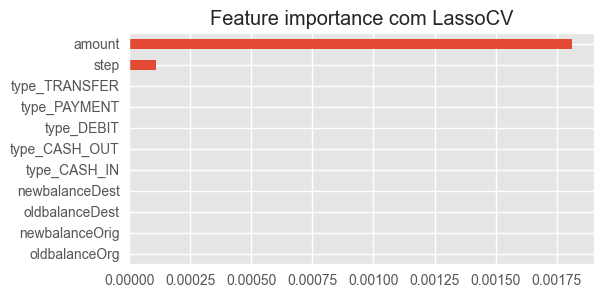

In [68]:
coef = pd.Series(lasso.coef_, index=x_train.columns)

imp_coef = coef.sort_values()

plt.rcParams['figure.figsize'] = (6, 3)
imp_coef.plot(kind="barh")
plt.title("Feature importance com LassoCV")
plt.show()

# 6.Sumarizando Resultados

In [52]:
modelos_dic = {
    "Regresão Logistica":{
        "Acurácia": accuracy_score(y_test, y_pred_lr).round(3),
        "Precision": precision_score(y_test, y_pred_lr).round(3),
        "Recall": recall_score(y_test, y_pred_lr).round(3),
        "F1 score": f1_score(y_test, y_pred_lr).round(3),
        "ROC/AUC": roc_auc_lr,
        "Execução (s)": round(tempo_total_lr, 3)
    },
    "Árvore Decisão":{
        "Acurácia": accuracy_score(y_test, y_pred_tree).round(3),
        "Precision": precision_score(y_test, y_pred_tree).round(3),
        "Recall": recall_score(y_test, y_pred_tree).round(3),
        "F1 score": f1_score(y_test, y_pred_tree).round(3),
        "ROC/AUC": roc_auc_tree,
        "Execução (s)": round(tempo_total_tree, 3)
    },
    "Random Forest":{
        "Acurácia": accuracy_score(y_test, y_pred_rnd).round(3),
        "Precision": precision_score(y_test, y_pred_rnd).round(3),
        "Recall": recall_score(y_test, y_pred_rnd).round(3),
        "F1 score": f1_score(y_test, y_pred_rnd).round(3),
        "ROC/AUC": roc_auc_rnd,
        "Execução (s)": round(tempo_total_rnd, 3)
    },
    "XGBoost":{
        "Acurácia": accuracy_score(y_test, y_pred_xgb).round(3),
        "Precision": precision_score(y_test, y_pred_xgb).round(3),
        "Recall": recall_score(y_test, y_pred_xgb).round(3),
        "F1 score": f1_score(y_test, y_pred_xgb).round(3),
        "ROC/AUC": roc_auc_xgb,
        "Execução (s)": round(tempo_total_xgb, 3)
    }   
}

In [53]:
modelos_sumario = pd.DataFrame(modelos_dic)

In [54]:
resultado_modelos = modelos_sumario.T.sort_values(by = 'Recall', ascending = False)

In [66]:
resultado_modelos

,Acurácia,Precision,Recall,F1 score,ROC/AUC,Execução (s)
Random Forest,1.00,0.96,0.79,0.87,0.90,121.23
Árvore Decisão,1.00,0.97,0.75,0.84,0.87,37.77
XGBoost,1.00,1.00,0.69,0.82,0.85,343.17
Regresão Logistica,1.00,0.92,0.41,0.57,0.71,39.07


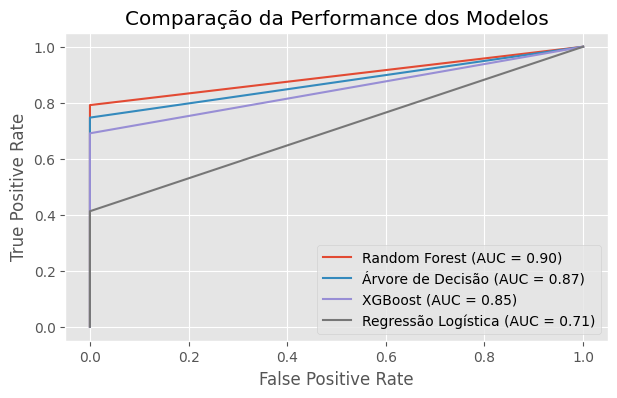

In [68]:
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(y_test, y_pred_lr)
roc_auc_1 = metrics.auc(fpr_1, tpr_1)

display_1 = metrics.RocCurveDisplay(fpr = fpr_1, tpr = tpr_1, roc_auc = roc_auc_1,
                                   estimator_name = 'Regressão Logística')


fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, y_pred_tree)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)

display_2 = metrics.RocCurveDisplay(fpr = fpr_2, tpr = tpr_2, roc_auc = roc_auc_2,
                                   estimator_name = 'Árvore de Decisão')


fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(y_test, y_pred_rnd)
roc_auc_3 = metrics.auc(fpr_3, tpr_3)

display_3 = metrics.RocCurveDisplay(fpr = fpr_3, tpr = tpr_3, roc_auc = roc_auc_3,
                                   estimator_name = 'Random Forest')


fpr_4, tpr_4, thresholds_4 = metrics.roc_curve(y_test, y_pred_xgb)
roc_auc_4 = metrics.auc(fpr_4, tpr_4)

display_4 = metrics.RocCurveDisplay(fpr = fpr_4, tpr = tpr_4, roc_auc = roc_auc_4,
                                   estimator_name = 'XGBoost')


fig, ax = plt.subplots(figsize = (7, 4))
plt.title('Comparação da Performance dos Modelos')

display_3.plot(ax = ax)
display_2.plot(ax = ax)
display_4.plot(ax = ax)
display_1.plot(ax = ax)

plt.show()

# 7.Tunning hiperparams

## RandomSearch

In [80]:
# Hiperparametors para Random Forest
rnd_params = {'n_estimators': [10, 20], 'max_depth': [8, 12],
              'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2, 4]}

# Hiperparametros para arvore de decisão
tree_params = {'max_depth': [8, 12], 'min_samples_split': [2, 4],
               'min_samples_leaf': [1, 2, 4]}


In [81]:
def busca_param(x, y, teste=None, modelo=None):
    if modelo == 'rnd':
        rnd = RandomForestClassifier()
        rs = RandomizedSearchCV(rnd, rnd_params, n_iter=5, cv=4, random_state=42, verbose=2)
    else:
        tree = DecisionTreeClassifier()
        rs = RandomizedSearchCV(tree, tree_params, n_iter=5, cv=4, random_state=42, verbose=2)
    
    rs.fit(x, y)
    
    print(f'RandomizedSearchCV: Modelo {modelo}, Teste {teste}')
    print(f"Melhores parametros para {modelo.capitalize()}: {rs.best_params_}")


### Decision Tree

In [ ]:
busca_param(x_train, y_train, teste = 1, modelo = 'tree')

In [82]:
tempo_inic_tree_teste = time.time()

tree_teste = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 4, max_depth = 12)

tree_teste.fit(x_train, y_train)

y_pred_tree_teste = tree_teste.predict(x_test)

tempo_final_tree_teste = time.time()

tempo_total_tree_teste = tempo_final_tree_teste - tempo_inic_tree_teste

Metricas para Decision Tree RandomSearchCV
Tempo de execução do modelo: 57.812 segundos
------------------------------------------------------
Acurácia: 1.0
Precision: 0.96
Recall: 0.758


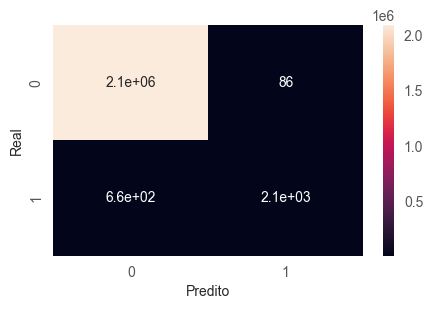

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.96      0.76      0.85      2710

    accuracy                           1.00   2099665
   macro avg       0.98      0.88      0.92   2099665
weighted avg       1.00      1.00      1.00   2099665

------------------------------------------------------


In [83]:
print("="*54)
print(f'Metricas para Decision Tree RandomSearchCV')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_tree_teste, 3)} segundos")
print("-"*54)
print("Acurácia:", accuracy_score(y_test, y_pred_tree_teste).round(3))
print("Precision:", precision_score(y_test, y_pred_tree_teste).round(3))
print("Recall:", recall_score(y_test, y_pred_tree_teste).round(3))
confusion_matrix = pd.crosstab(y_test, y_pred_tree_teste, rownames = ['Real'], colnames = ['Predito'])
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print('-'*54)
print(classification_report(y_test, y_pred_tree_teste))
print('-'*54)

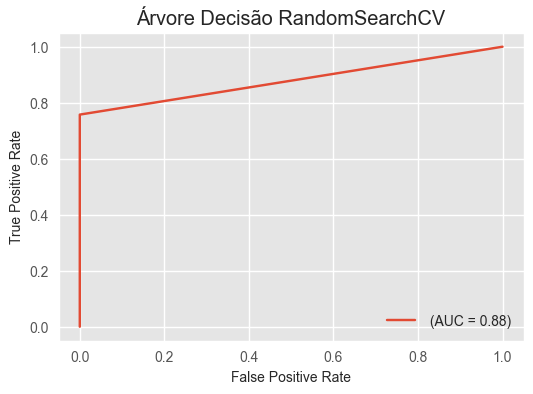

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_tree_teste)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='')
fig, ax = plt.subplots(figsize=(6,4)) 
plt.title('Árvore Decisão RandomSearchCV')
display.plot(ax=ax)
plt.show()

### Random Forest

In [ ]:
busca_param(x_train, y_train, teste = 1, modelo = 'rnd')

In [90]:
tempo_inic_rnd_rs = time.time()

rnd_rs = RandomForestClassifier(n_estimators = 10, min_samples_split = 2, 
                                   min_samples_leaf = 4, max_depth = 12)

rnd_rs.fit(x_train, y_train)

y_pred_rnd_rs = rnd_rs.predict(x_test)

tempo_final_rnd_rs = time.time()

tempo_total_rnd_rs = tempo_final_rnd_rs - tempo_inic_rnd_rs

Metricas para Random Forest RandomSearchCV
Tempo de execução do modelo: 162.164 segundos
------------------------------------------------------
Acurácia: 1.0
Precision: 0.992
Recall: 0.739


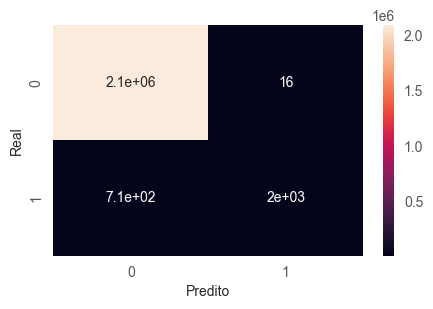

------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096955
           1       0.99      0.74      0.85      2710

    accuracy                           1.00   2099665
   macro avg       1.00      0.87      0.92   2099665
weighted avg       1.00      1.00      1.00   2099665

------------------------------------------------------


In [91]:
print("="*54)
print(f'Metricas para Random Forest RandomSearchCV')
print("="*54)
print(f"Tempo de execução do modelo: {round(tempo_total_rnd_rs, 3)} segundos")
print("-"*54)
print("Acurácia:", accuracy_score(y_test, y_pred_rnd_rs).round(3))
print("Precision:", precision_score(y_test, y_pred_rnd_rs).round(3))
print("Recall:", recall_score(y_test, y_pred_rnd_rs).round(3))
confusion_matrix = pd.crosstab(y_test, y_pred_rnd_rs, rownames = ['Real'], colnames = ['Predito'])
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print('-'*54)
print(classification_report(y_test, y_pred_rnd_rs))
print('-'*54)

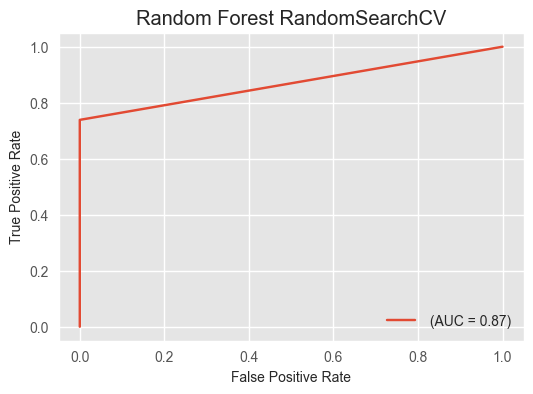

In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rnd_rs)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='')
fig, ax = plt.subplots(figsize=(6,4)) 
plt.title('Random Forest RandomSearchCV')
display.plot(ax=ax)
plt.show()

# 8.Análise dos resultados e Conclusão

## Performance e seleção do melhor modelo

In [67]:
resultado_modelos.style.apply(lambda x: ['background-color: yellow' if x['Recall'] == resultado_modelos['Recall'].max() else '' for i in x], axis=1)

,Acurácia,Precision,Recall,F1 score,ROC/AUC,Execução (s)
Random Forest,1.000000,0.958000,0.792000,0.867000,0.895734,121.235000
Árvore Decisão,1.000000,0.968000,0.747000,0.843000,0.873416,37.775000
XGBoost,1.000000,0.998000,0.691000,0.817000,0.845387,343.167000
Regresão Logistica,0.999000,0.920000,0.413000,0.570000,0.706250,39.066000


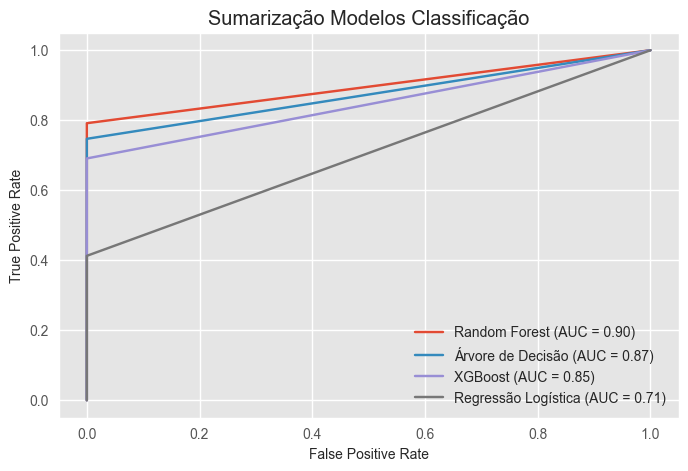

In [102]:
fig, ax = plt.subplots(figsize = (8, 5))
plt.title('Sumarização Modelos Classificação')

display_3.plot(ax = ax)
display_2.plot(ax = ax)
display_4.plot(ax = ax)
display_1.plot(ax = ax)

plt.show()

Devido o fato de os dados estarem desbalanceados se torna dificil obter modelos extremamentes performaticos, porém algum aumento a mais de eficiencia em identificar fraudes de maneira adequada já representa a economia de uma grande quantia de dinheiro e investimentos.<br>
<br>
O modelo de regressão linear foi o menos eficiente, já que se trata de um modelo mais simples e de facil interpretação, mas já é um modelo que poderia trazer algum benefício se utilizado.<br>
<br>
Nosso melhor modelo foi o RandomForest, porém com um tempo de execução de 120s. Já a árvore de decisão não demonstrou performance muito abaixo, apresentando tempo de execução 3 vezes mais rápido.<br>
<br>
O XGBoost por ser um modelo mais complexo demandou maior tempo de execução e não obteve resultados melhores do que a árvore de decisão. Isso pode ser devido a escolha dos hiperparametros, e seria mais adequado investigar outras opções de otimização. Porém as técnicas de Random ou GridSearch para modelos mais complexos podem ser computacionalmente caras, e no caso não foi possível investigar mais a fundo devido capacidade da maquina em que a análise foi usada.<br>
<br>
Portanto nesse caso se quisermos um modelo mais rápido e mais simples poderemos implementar a **ÁRVORE DE DECISÃO** mas se quisermos um modelo mais eficiente as custas da velocidade poderemos implementar **RANDOM FOREST**, demandas que tem que se adequar as necessidades da instituição. 

# 9.Referencias

## Data-Leakage

- https://machinelearningmastery.com/data-preparation-without-data-leakage/

- https://towardsdatascience.com/data-leakage-in-machine-learning-6161c167e8ba

- https://towardsdatascience.com/preventing-data-leakage-in-your-machine-learning-model-9ae54b3cd1fb



## Feature Importance/Selection

- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

- https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

- https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

- https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/

- https://neptune.ai/blog/feature-selection-methods

- https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

- https://gist.github.com/gvyshnya/abe6c06767922f8762bd288c2d897ce5

- https://gist.github.com/gvyshnya/513080f611491b8baa08cc1bf6987144

- https://gist.github.com/gvyshnya/abe6c06767922f8762bd288c2d897ce5

- https://gist.github.com/gvyshnya/de775c04f7f752eb66c1d40ed40bcb05

- https://gist.github.com/gvyshnya/7349198e74b4c5fc6caad18ac150ff07